In [1]:
from sklearn import datasets, model_selection, svm, metrics

mnist = datasets.load_digits()

In [2]:
mnist.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [3]:
mnist.data.shape

(1797, 64)

In [4]:
mnist.target.shape

(1797,)

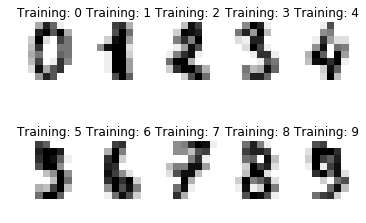

In [5]:
import matplotlib.pyplot as plt
images_and_labels = list(zip(mnist.images, mnist.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Training: %i' % label)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=0)

In [7]:
x_train

array([[  0.,   3.,  13., ...,  12.,   9.,   1.],
       [  0.,   0.,   1., ...,  13.,   1.,   0.],
       [  0.,   0.,   4., ...,   9.,   0.,   0.],
       ..., 
       [  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.],
       [  0.,   0.,   6., ...,  11.,   0.,   0.]])

In [8]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
clf.score(x_train, y_train)

1.0

In [10]:
clf.score(x_test, y_test)

0.48666666666666669

In [11]:
print(mnist.target[-10:])# 正解
print(clf.predict(mnist.data[-10:])) # 予測

[5 4 8 8 4 9 0 8 9 8]
[4 4 8 8 4 9 0 8 9 8]


## metrics.confusion_matrixについて

行が正解のy_testで列が予測したy_pred
参考: https://pythondatascience.plavox.info/scikit-learn/%E5%88%86%E9%A1%9E%E7%B5%90%E6%9E%9C%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E8%A9%95%E4%BE%A1



In [12]:
from sklearn import metrics
y_pred = clf.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[24  0  0  0 13  0  0  0  0  0]
 [ 0 10  0  0 33  0  0  0  0  0]
 [ 0  0 17  0 27  0  0  0  0  0]
 [ 0  0  0 42  3  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0 32 16  0  0  0  0]
 [ 0  0  0  0 24  0 28  0  0  0]
 [ 0  0  0  0 31  0  0 17  0  0]
 [ 0  0  0  0 47  0  0  0  1  0]
 [ 0  0  0  0 21  0  0  0  0 26]]
             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



# 前処理としてスケール変換

In [17]:
# 前処理としてスケール変換
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
x_train_scaled

array([[ 0.    ,  0.375 ,  0.8125, ...,  0.75  ,  0.5625,  0.0625],
       [ 0.    ,  0.    ,  0.0625, ...,  0.8125,  0.0625,  0.    ],
       [ 0.    ,  0.    ,  0.25  , ...,  0.5625,  0.    ,  0.    ],
       ..., 
       [ 0.    ,  0.    ,  0.3125, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.25  , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.375 , ...,  0.6875,  0.    ,  0.    ]])

In [15]:
clf.fit(x_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
clf.score(x_test, y_test)

0.09555555555555556